# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

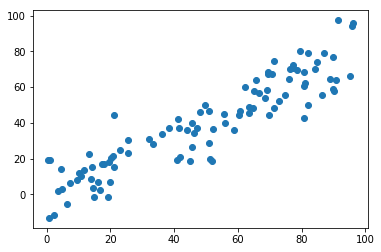

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# demean

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

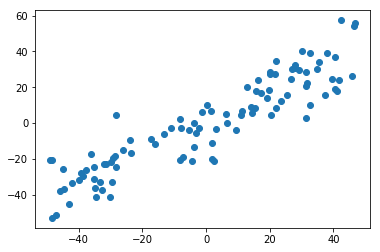

In [7]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [9]:
np.mean(X_demean[:,0])

1.3429257705865893e-14

In [10]:
np.mean(X_demean[:,1])

1.0054179711005418e-14

# 梯度上升法

In [11]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [12]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [20]:
def df_debug(theta, X, epsilon=0.0001):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (f(theta_1, X) - f(theta_2, X)) / (2*epsilon)
    return res

In [21]:
# 获取w的单位向量
def direction(w):
    # np.linalg.norm是求矩阵的模
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w

In [22]:
initial_w = np.random.random(X.shape[1])  # 注意2：不能用0向量开始
initial_w

array([0.70806357, 0.24399307])

In [23]:
eta = 0.001

In [24]:
# 注意3： 不能使用StandardScaler标准化数据

In [25]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.75150058, 0.65973243])

In [28]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

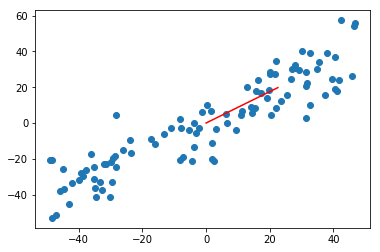

In [29]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

In [32]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

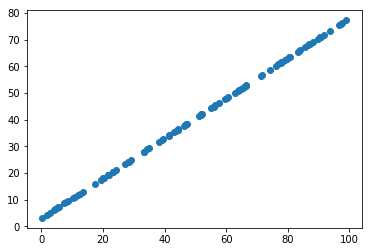

In [33]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [34]:
X2_demean = demean(X2)

In [36]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

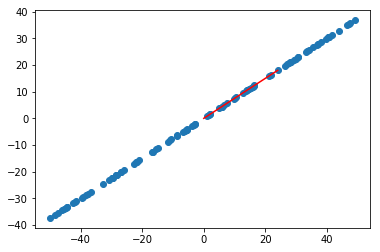

In [39]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color='r')
plt.show()